In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


# Fashion MNIST

## 데이터 다운 및 분석

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
print("트레이닝 이미지 shape: {}, dtype: {}".format(train_images.shape, train_images.dtype))
print("트레이닝 라벨 shape: {}, dtype: {}".format(train_labels.shape, train_labels.dtype))

트레이닝 이미지 shape: (60000, 28, 28), dtype: uint8
트레이닝 라벨 shape: (60000,), dtype: uint8


In [4]:
print("테스트 이미지 shape: {}, dtype: {}".format(test_images.shape, test_images.dtype))
print("테스트 라벨 shape: {}, dtype: {}".format(test_labels.shape, test_labels.dtype))

테스트 이미지 shape: (10000, 28, 28), dtype: uint8
테스트 라벨 shape: (10000,), dtype: uint8


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 데이터 전처리

샘플 데이터 하나 살펴보기

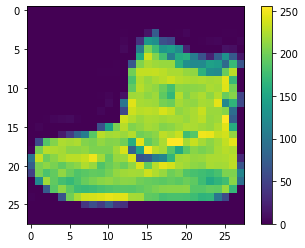

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

데이터를 비율로 변경. 트레이닝을 더 잘 시키기 위함

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

binary cmap으로 트레이닝 이미지 여러 개 살펴보기

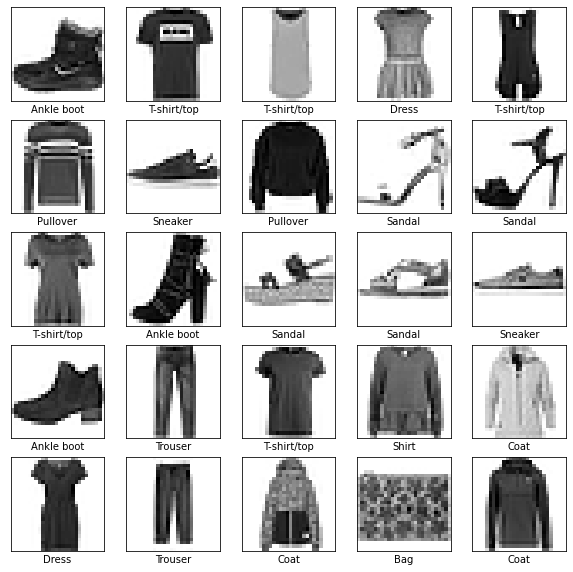

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 모델 1

### 모델 1 생성

In [18]:
def fashion_classification_model():
  input = keras.layers.Input((28, 28))
  flatten = keras.layers.Flatten()(input)#28x28을 한줄로 변환(784)
  dense_1 = keras.layers.Dense(128, activation=keras.activations.relu)(flatten)#relu(음수는 0으로 양수는 뽑아낸다.)
  #functional programming(keras.layers.Dense() 가 함수 자체를 리턴한다.)
  dense_2 = keras.layers.Dense(10)(dense_1)

  return keras.models.Model(inputs=[input], outputs=[dense_2])

In [19]:
model = fashion_classification_model()
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


##모델 1-1 생성

In [14]:
def fashion_classification_model_seq():
    model = keras.Sequential()

    model.add(keras.layers.Input((28, 28)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation=keras.activations.relu))
    model.add(keras.layers.Dense(10))

    return model


  #sequential 모델은 input을 넣어서 리턴할 수 없다...
  #그렇기 때문에 functional로 한다.



### 모델 1 트레이닝

In [25]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[keras.metrics.SparseCategoricalAccuracy(name="sparse_categorical_accuracy")])
# compile : 앞에서 짠 model이 제대로 짜여져있는지 살펴보는 역할
# loss : 기계가 학습하는 방식을 지정해주는 것
# metrics : 사람이 보는 형태. training이 잘되었는지 안되었는지 판단하는 근거 (metrics는 훈련하는데 지장이 없음. 사람기준이기 때문에)
# Categorical entropy

# SparseCategoricalCrossentropy
# 0
# 1
# 2
# 9
# 인코딩 되어있는 것
# [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
# [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
# [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
# [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# 'accuracy'로 넣으면, 자동으로 다음 중 하나로 전환해서 측정합니다.
# keras.metrics.BinaryAccuracy, keras.metrics.CategoricalAccuracy, keras.metrics.SparseCategoricalAccuracy

# 1875 * 32(배치사이즈)

In [26]:
history = model.fit(train_images, train_labels, epochs=10)
#history에는 training의 loss가 드

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2345 - sparse_categorical_accuracy: 0.9117
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2261 - sparse_categorical_accuracy: 0.9156
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2171 - sparse_categorical_accuracy: 0.9191
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2150 - sparse_categorical_accuracy: 0.9189
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2060 - sparse_categorical_accuracy: 0.9225
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2028 - sparse_categorical_accuracy: 0.9239
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1959 - sparse_categorical_accuracy: 0.9269
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1910 - sparse_categorical_accuracy: 0.9283
Epoch 9/10
1875/1875 [==========

[0.9116500020027161,
 0.9156166911125183,
 0.9190833568572998,
 0.9189000129699707,
 0.9225000143051147,
 0.9239000082015991,
 0.9268666505813599,
 0.9283166527748108,
 0.9304333329200745,
 0.9321833252906799]

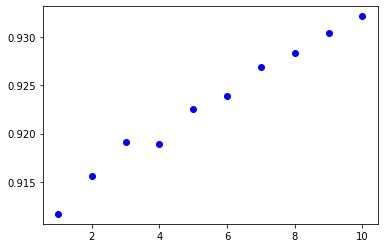

In [28]:
history_accuracy = history.history["sparse_categorical_accuracy"]

epochs = range(1, len(history_accuracy) + 1)
plt.plot(epochs, history_accuracy, "bo", label="Training accuracy")
history_accuracy

[0.23449410498142242,
 0.2260696291923523,
 0.21709252893924713,
 0.21498051285743713,
 0.20597709715366364,
 0.2027919441461563,
 0.19587330520153046,
 0.1909761130809784,
 0.18638403713703156,
 0.1808115392923355]

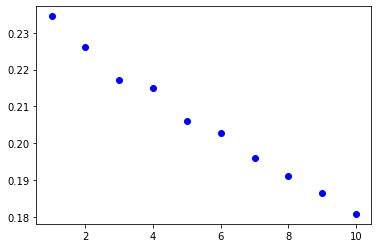

In [29]:
history_loss = history.history["loss"]

epochs = range(1, len(history_loss) + 1)
plt.plot(epochs, history_loss, "bo", label="Training loss")
history_loss

### 모델 1 테스트 및 예측

In [24]:
# test_images : 10000개의 image
# 테스트 정확도와 위의 것을 줄이는 것이 목적이다.
# 일반적인 방식은 6만개를 받아서 그 중 테스트용으로 분류하고, 나머지로 학습시켜서 비교를한다.
# 그래서 일반적으로는 test데이터는 공개를 안 한다.
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.3840 - sparse_categorical_accuracy: 0.8663
테스트 정확도: 0.8662999868392944


## 모델 2

### 모델 2 생성

In [30]:
def fashion_classification_model_2(pre_trained_fashion_classification_model):
  pre_classification = pre_trained_fashion_classification_model(
      pre_trained_fashion_classification_model.inputs)
  softmax_1 = keras.layers.Softmax()(pre_classification) #softmax ? 분류합을 1로 만들어주는 layer, training parameter가 없다.

  return keras.models.Model(
      inputs=pre_trained_fashion_classification_model.inputs, 
      outputs=[softmax_1])

In [31]:
model2 = fashion_classification_model_2(model)
model2.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
functional_3 (Functional)    (None, 10)                101770    
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### 모델 2 예측

In [34]:
predictions = model2.predict(test_images)

In [35]:
predictions.shape

(10000, 10)

In [37]:
predictions[0]*100

array([1.8904478e-10, 4.1060528e-13, 9.0495482e-13, 1.0511514e-14,
       3.2722606e-11, 7.1700616e-04, 7.6921941e-11, 3.2510540e-01,
       3.3802301e-08, 9.9674187e+01], dtype=float32)

In [38]:
np.argmax(predictions[0]) ##몇번째게 가장 크냐? => index 9 (10번째)

9

In [39]:
test_labels[0]

9

### 모델 2 예측 그리기

In [41]:
# 해당 이미지가 몇번 카테고리인지 확률로 plotting하는 함수
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

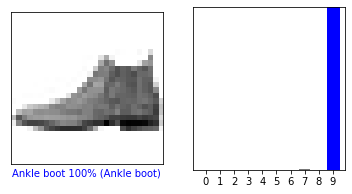

In [42]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

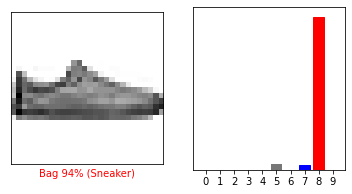

In [43]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

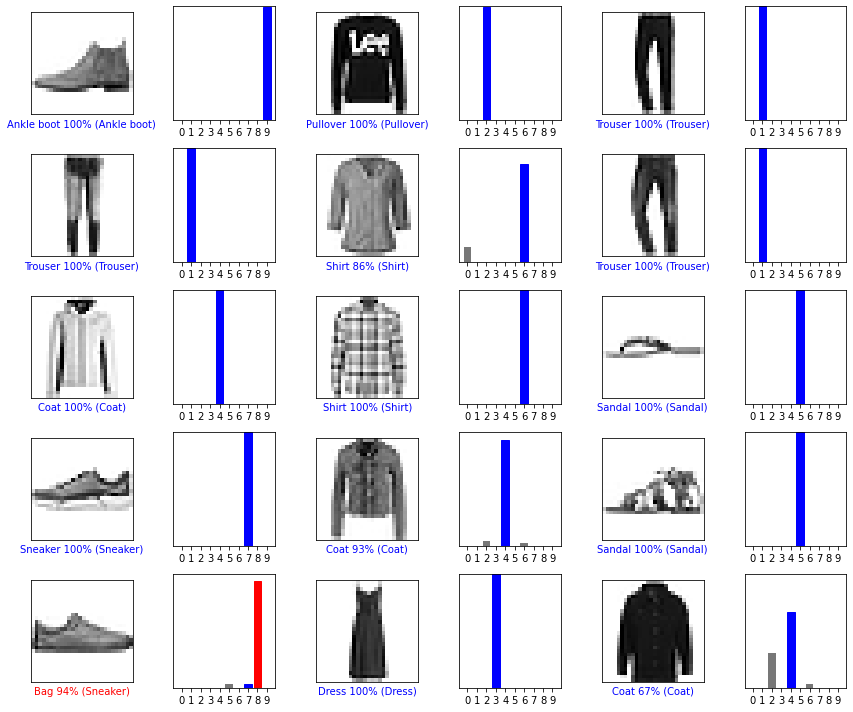

In [44]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# 모델 저장, 가중치 저장 및 불러오기

In [45]:
def save_model(model_name: str, model: keras.models.Model):
    model_json = model.to_json()
    with open(model_name, "w") as json_file:
        json_file.write(model_json)

In [46]:
from keras.models import model_from_json
from typing import Optional

def load_model(
    model_name: str, with_weights_path: Optional[str] = None
) -> keras.models.Model:
    json_file = open(model_name, "r")
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)
    if with_weights_path:
        model.load_weights(with_weights_path)
    return model

In [47]:
# 구글 드라이브 import
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

import os
gdrive_path = os.path.join("/gdrive", "My Drive", "lecture", "resources")

Mounted at /gdrive


In [48]:
save_model(os.path.join(gdrive_path, "model2_000.json"), model2)

In [49]:
import time
run_id: str = time.strftime("%Y%m%d-%H%M%S")

model2.save_weights(os.path.join(gdrive_path, "model2_000__{}.hdf5".format(run_id)))

In [52]:
loaded_model2 = load_model(os.path.join(gdrive_path, "model2_000.json"))
prediction_loaded_model2 = loaded_model2.predict(test_images)

print("트레이닝한 모델의 예측: {}".format(np.argmax(predictions[0])))
print(predictions[0])
print("불러온 모델의 예측: {}".format(np.argmax(prediction_loaded_model2[0])))
print(prediction_loaded_model2[0])
print("정답 :{}".format(test_labels[0]))

트레이닝한 모델의 예측: 9
[1.8904479e-12 4.1060528e-15 9.0495484e-15 1.0511514e-16 3.2722607e-13
 7.1700615e-06 7.6921938e-13 3.2510541e-03 3.3802300e-10 9.9674183e-01]
불러온 모델의 예측: 0
[0.21600033 0.04693958 0.07085097 0.09823732 0.09976485 0.06190048
 0.17038013 0.07627302 0.10780115 0.05185217]
정답 :9


In [55]:
json_model_path = os.path.join(gdrive_path, "model2_000.json")
model_weight_path = os.path.join(gdrive_path, "model2_000__20201102-120925.hdf5")
loaded_model2_with_weight = load_model(json_model_path, model_weight_path)
prediction_loaded_model2_with_weight = loaded_model2_with_weight.predict(test_images)

print("트레이닝한 모델의 예측: {}".format(np.argmax(predictions[0])))
print(predictions[0])
print("가중치와 함께 불러온 모델의 예측: {}".format(np.argmax(prediction_loaded_model2_with_weight[0])))
print(prediction_loaded_model2_with_weight[0])
print("정답 :{}".format(test_labels[0]))

트레이닝한 모델의 예측: 9
[1.8904479e-12 4.1060528e-15 9.0495484e-15 1.0511514e-16 3.2722607e-13
 7.1700615e-06 7.6921938e-13 3.2510541e-03 3.3802300e-10 9.9674183e-01]
가중치와 함께 불러온 모델의 예측: 9
[1.8904479e-12 4.1060528e-15 9.0495484e-15 1.0511514e-16 3.2722607e-13
 7.1700615e-06 7.6921938e-13 3.2510541e-03 3.3802300e-10 9.9674183e-01]
정답 :9
